In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm 

In [28]:
df = pd.read_excel('/Users/giridharana.r/Desktop/S Assignments/DATA 270 - GWAR/Datasets/Bankruptcy_data_Final.xlsx') 

In [29]:
df.isnull().sum()

Data Year - Fiscal       0
Tobin's Q              252
EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [30]:
df.isnull().sum() * 100 / len(df) 

Data Year - Fiscal    0.000000
Tobin's Q             0.271341
EPS                   0.005384
Liquidity             0.265957
Profitability         0.265957
Productivity          0.265957
Leverage Ratio        0.027996
Asset Turnover        0.265957
Operational Margin    5.983504
Return on Equity      0.008614
Market Book Ratio     0.061375
Assets Growth         7.215307
Sales Growth          7.215307
Employee Growth       7.548023
BK                    0.000000
dtype: float64

In [31]:
df['BK'].unique()

array(['No', 'NO', 'Not Bankrupted', 'Yes', 'YES', 'Bankrupted'],
      dtype=object)

In [32]:
df.replace({'BK': {'YES': 'Bankrupted', 'No': 'Not Bankrupted','Yes': 'Bankrupted','NO': 'Not Bankrupted'}}, inplace=True)


In [33]:
df["BK"].value_counts()

Not Bankrupted    92314
Bankrupted          558
Name: BK, dtype: int64

In [34]:
px.histogram(df, x="BK", color="BK", title="Bankruptcy Distribution",width=500, height=500)

In [35]:
df['BK'].unique() 

array(['Not Bankrupted', 'Bankrupted'], dtype=object)

In [36]:
encoder = LabelEncoder()
df['BK'] = encoder.fit_transform(df['BK'])

In [37]:
df['BK'].unique()

array([1, 0])

In [38]:
#df = df.fillna(df.median())
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df= pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [39]:
df.isnull().sum()

Data Year - Fiscal    0
Tobin's Q             0
EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

In [40]:
df.duplicated().sum()

27

In [41]:
df.drop_duplicates(keep = 'last', inplace = True) ### Removing the duplicate rows

In [42]:
df.drop_duplicates(keep = 'last').shape

(92845, 15)

In [43]:
df.replace({'BK': {0: 1, 1: 0}}, inplace=True)

<AxesSubplot:xlabel='BK', ylabel='count'>

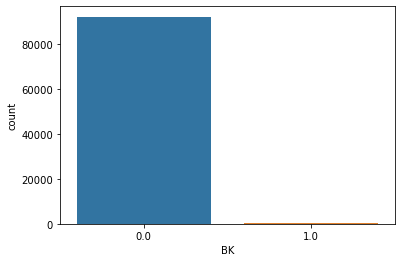

In [44]:
sns.countplot(x='BK', data=df)

## Outliers

In [45]:
def get_fraction_valued_columns(df):
    my_columns  = []
    for col in df.columns:
        if (df[col].max()<=1) & (df[col].min() >= 0):
            my_columns.append(col)
    return(my_columns)

fractional_columns = get_fraction_valued_columns(df=df.drop(['BK'],axis=1))
non_fraction_columns = df.drop(['BK'],axis=1).columns.difference(fractional_columns)
print("# Fraction-only Columns",len(fractional_columns),"\t","# Other than Fraction-only Columns", len(non_fraction_columns))

# Fraction-only Columns 0 	 # Other than Fraction-only Columns 14


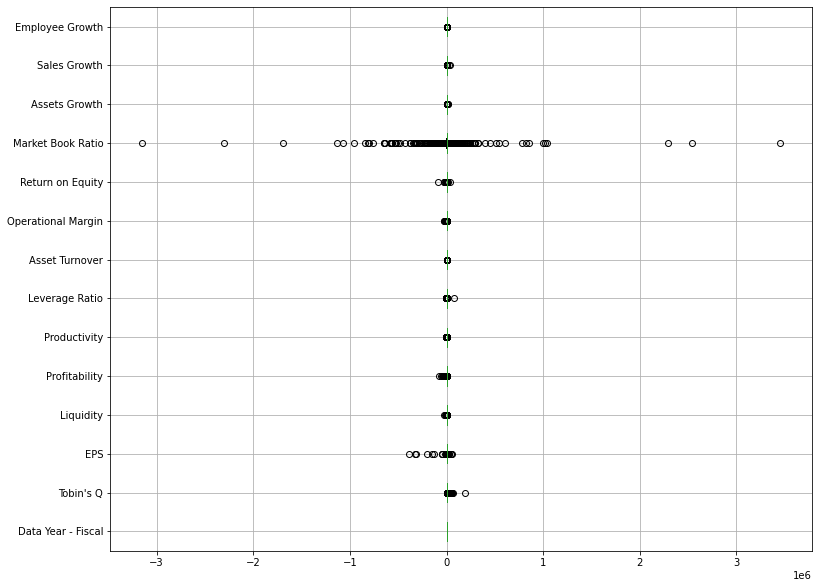

In [46]:
df[non_fraction_columns].boxplot(vert=False,figsize= (15,10))
plt.subplots_adjust(left=0.25)
plt.show()

In [47]:
## Outlier handling techniques
log_transformed_cols = []
for col in df[non_fraction_columns].columns:
    if (df[col].quantile(1) >= 100* df[col].quantile(0.99)) |  (sum(df[col] > df[col].quantile(0.99)) <= 10):
        df[col] = np.log1p(df[col])
        log_transformed_cols.append(col)
   
## Change names of log transformed column
# log_names = "log_" + df[log_transformed_cols].columns
# print(df[col].size)

# df.rename(columns={df[log_transformed_cols].columns[i]: log_names[i] for i in range(len(log_names))}, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log1p

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

invalid value encountered in log1p



The following features are log transformed after they fulfill outlier detection condition. 

 ['Data Year - Fiscal', "Tobin's Q", 'EPS', 'Profitability', 'Productivity', 'Leverage Ratio', 'Operational Margin', 'Return on Equity', 'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth']


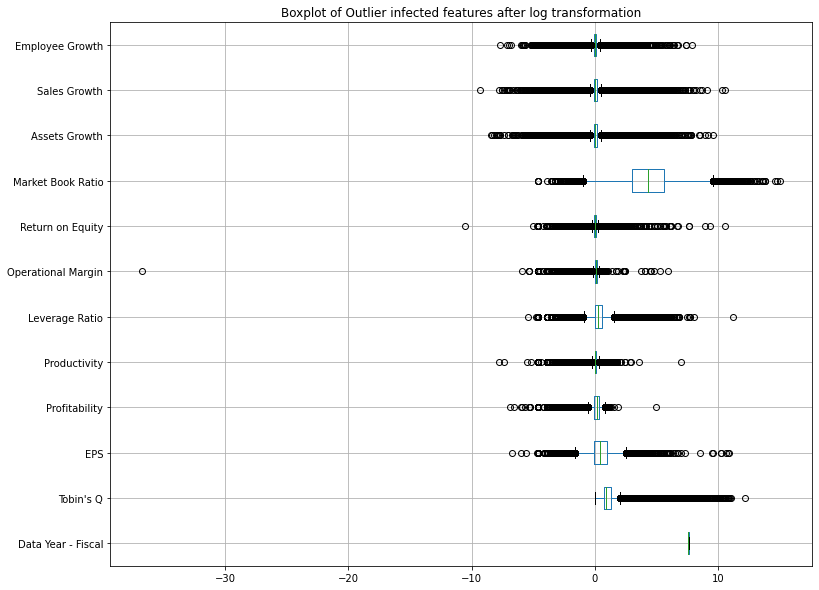

In [49]:
print("The following features are log transformed after they fulfill outlier detection condition.","\n\n",log_transformed_cols)
df[log_transformed_cols].boxplot(vert=False,figsize= (15,10))
plt.subplots_adjust(left=0.25)
plt.title("Boxplot of Outlier infected features after log transformation")
plt.show()

In [50]:
df.head()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,7.590852,0.683097,0.947789,0.36,0.165514,0.122218,0.845868,1.77,0.067659,0.139762,1.169381,0.063699,0.025964,0.015203,0.0
1,7.591357,0.683097,0.879627,0.36,0.173953,0.113329,0.837248,1.59,0.067659,0.122218,1.226712,0.118954,0.014177,0.039392,0.0
2,7.591862,0.625938,0.270027,0.32,0.122218,0.076961,0.708036,1.55,0.048790,0.039221,1.269761,0.313406,0.283605,0.448859,0.0
3,7.592366,0.756122,0.536493,0.28,0.131028,0.076961,0.587787,1.39,0.058269,0.048790,1.837370,-0.021029,-0.126588,-0.100805,0.0
4,7.592870,0.815365,0.559616,0.41,0.122218,0.076961,0.182322,1.30,0.058269,0.039221,2.270062,0.209522,0.136982,0.051672,0.0


In [51]:
df.to_csv('/Users/giridharana.r/Desktop/S Assignments/DATA 270 - GWAR/Datasets/Bankruptcy_data_outlier_treated_withour_names.csv')

In [53]:
df.isnull().sum()

Data Year - Fiscal        0
Tobin's Q                 0
EPS                    8696
Liquidity                 0
Profitability         19980
Productivity           5468
Leverage Ratio         3896
Asset Turnover            0
Operational Margin    11470
Return on Equity       4425
Market Book Ratio      8427
Assets Growth             0
Sales Growth             18
Employee Growth           0
BK                        0
dtype: int64